#### Import 


In [2]:
import xarray as xr
from numpy import *
from netCDF4 import *
from datetime import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm

In [3]:
netcdf_file = 'wrfout_d02_2019-11-12_sample.nc'
xr_data = xr.open_dataset(netcdf_file)
xr_data

<xarray.Dataset> Size: 8MB
Dimensions:  (XTIME: 24, south_north: 120, west_east: 111)
Coordinates:
  * XTIME    (XTIME) datetime64[ns] 192B 2019-11-12 ... 2019-11-12T23:00:00
    XLONG    (south_north, west_east) float32 53kB ...
    XLAT     (south_north, west_east) float32 53kB ...
Dimensions without coordinates: south_north, west_east
Data variables:
    Q2       (XTIME, south_north, west_east) float32 1MB ...
    T2       (XTIME, south_north, west_east) float32 1MB ...
    PSFC     (XTIME, south_north, west_east) float32 1MB ...
    U10      (XTIME, south_north, west_east) float32 1MB ...
    V10      (XTIME, south_north, west_east) float32 1MB ...
    RAINNC   (XTIME, south_north, west_east) float32 1MB ...
Attributes: (12/138)
    CDI:                             Climate Data Interface version 1.9.3 (ht...
    Conventions:                     CF-1.6
    history:                         Wed Sep 06 15:23:44 2023: cdo selvar,T2,...
    TITLE:                            OUTPUT FROM WRF V4.4 MODEL
    START_DATE:                      2019-06-15_00:00:00
    SIMULATION_START_DATE:           2019-06-15_00:00:00
    ...                              ...
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    CDO:                             Climate Data Operators version 1.9.3 (ht...

In [4]:
lon = xr_data.coords["XLONG"].values
lat = xr_data.coords["XLAT"].values
data = xr_data.data_vars["T2"].values

#### exercise 1

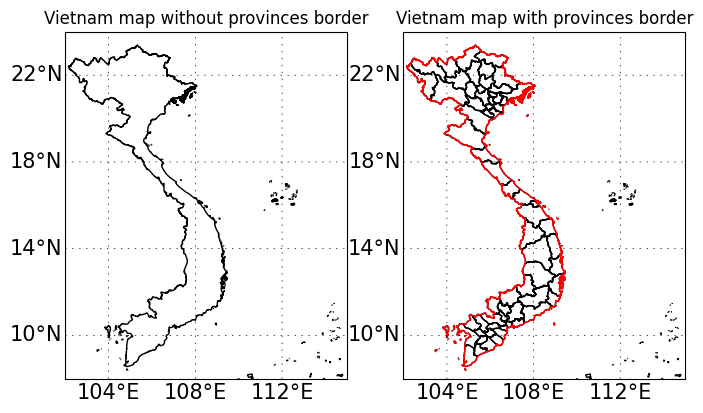

In [6]:
#----#----#----#----#----#----#
# CREATE MAP
#----#----#----#----#----#----#

fig = plt.figure(figsize=(8,7))

#basemap setting
lon_min = 102
lon_max = 115
lat_min = 8
lat_max = 24

for i in range(2):
   ax = plt.subplot(1,2, i+1)
   map2 = Basemap(projection='merc',
                  llcrnrlon=lon_min, #lower left corner longtitude
                  llcrnrlat=lat_min, #lower left corner lattitude
                  urcrnrlon=lon_max, #upper right corner longtitude
                  urcrnrlat=lat_max, #upper right corner lattitude
                  resolution='i',epsg=4326)

   #draw the lat and lon
   parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
   meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
   map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
   map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

   map2.readshapefile(f"gadm41_VNM_0/gadm41_VNM_{i}",f'gadm41_VNM_{i}', linewidth=1, color='k')

   if i == 1:
      map2.readshapefile(f"gadm41_VNM_0/gadm41_VNM_0",f'gadm41_VNM_0', linewidth=1, color='r')
      
   # add islands
   map2.readshapefile(r'haidao/haidao', 'haidao',
      linewidth=1, color='k')
   
   tmp_text = 'out' if i == 0 else ''
   plt.title("Vietnam map with" + tmp_text + " provinces border")


plt.show()

#### exercise 2

In [101]:
print(f"Shape of lat and lon: {lat.shape}, {lon.shape}")
print(f"Shape of data: {data.shape}")

Shape of lat and lon: (120, 111), (120, 111)
Shape of data: (24, 120, 111)


#### exercise 3

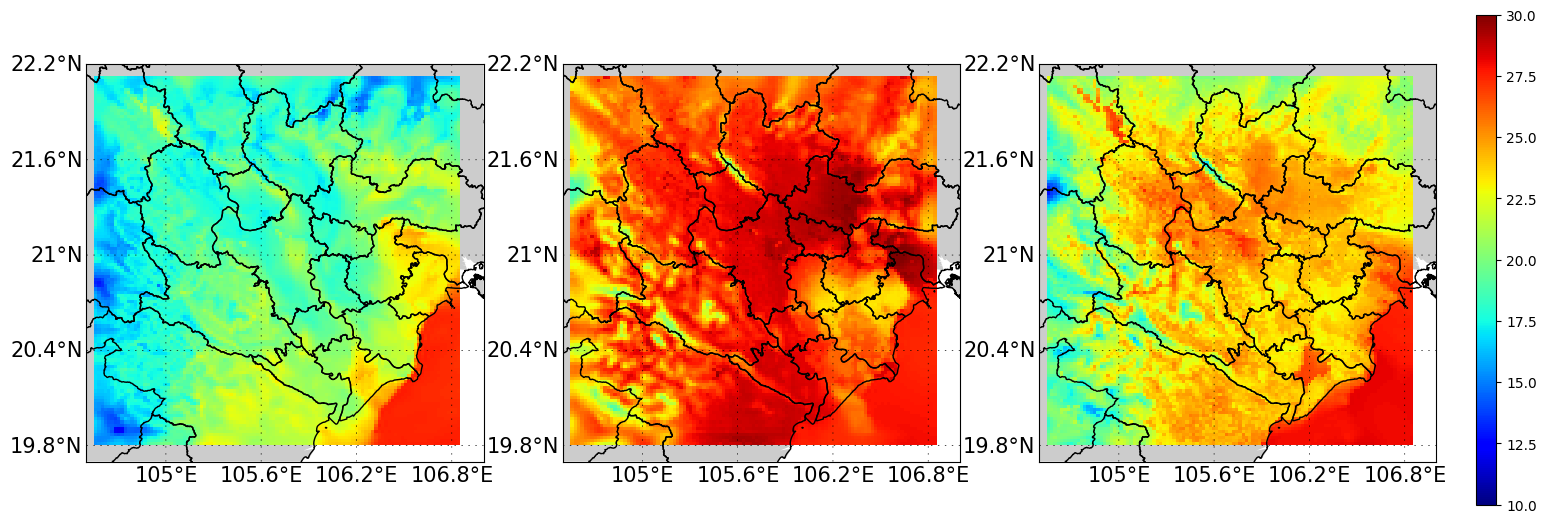

In [32]:
#now, create a map
fig = plt.figure(figsize=(20,7))
#basemap setting
lon_min = 104.5
lon_max = 107
lat_min = 19.7
lat_max = 22.2

for i in range(3):
   ax = plt.subplot(1,3, i+1)
   map2 = Basemap(projection='merc',
                  llcrnrlon=lon_min, #lower left corner longtitude
                  llcrnrlat=lat_min, #lower left corner lattitude
                  urcrnrlon=lon_max, #upper right corner longtitude
                  urcrnrlat=lat_max, #upper right corner lattitude
                  resolution='i',epsg=4326)

   #some decorations
   map2.fillcontinents(zorder=0)

   #draw the lat and lon
   parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
   meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
   map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
   map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

   #add vietnam
   map2.readshapefile(r'gadm41_VNM_0/gadm41_VNM_1', "gadm41_VNM_1", linewidth=1,color='k')

   #now plot the data
   hour = i*6 

   cm = plt.pcolormesh( lon , lat , data[hour,:,:]-273.15,vmin = 10,vmax = 30,cmap='jet')


   # print (data[hour:,0,0]-273.3)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, #left - right align
                        0.15,  #up - down align 
                        0.01, #width
                        0.7 # height
                        ])
fig.colorbar(cm, cbar_ax)
plt.show()

#### exercise 4

In [ ]:
#now, create a map
fig = plt.figure(figsize=(20,7))
#basemap setting
lon_min = 104.5
lon_max = 107
lat_min = 19.7
lat_max = 22.2

vrange = [(15,25), (20,30), (15,30)]

for i in range(3):
    ax = plt.subplot(1,3, i+1)
    map2 = Basemap(projection='merc',
                  llcrnrlon=lon_min, #lower left corner longtitude
                  llcrnrlat=lat_min, #lower left corner lattitude
                  urcrnrlon=lon_max, #upper right corner longtitude
                  urcrnrlat=lat_max, #upper right corner lattitude
                  resolution='i',epsg=4326)

   #some decorations
    map2.fillcontinents(zorder=0)

   #draw the lat and lon
    parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
    meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
    map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
    map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

   #add vietnam
    map2.readshapefile(r'gadm41_VNM_0/gadm41_VNM_1', "gadm41_VNM_1", linewidth=1,color='k')

   #now plot the data
    hour = i*6 

    cm = plt.pcolormesh( lon , lat , data[hour,:,:]-273.15,vmin = 10,vmax = 30,cmap='jet')
    

   # print (data[hour:,0,0]-273.3)

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.82, #left - right align
#                         0.15,  #up - down align 
#                         0.01, #width
#                         0.7 # height
#                         ])
# fig.colorbar(cm, cbar_ax)
plt.show()